In [114]:
from sympy import*
from dtumathtools import*
init_printing()

In [115]:
x, y, z, x1, x2 = symbols("x, y, z, x1, x2")
u, w, t = symbols("u, w, t")

# Exercise 1

## a)
We are given 2 partial derivatives with respect to both $x$ and $y$ of a function $f(x,y)$. To find the stationary points we need to equate the partial derivatives to $0$.

In [4]:
df_dx = 6*x - 6*y
df_dy = 6*y**2 - 6*x

#using sympy Eq function and solve method to solve the system of 2 non-linear equations
solve([Eq(df_dx,0), Eq(df_dy,0)], x, y)

We got 2 stationary points: $(0,0)$, $(1,1)$.

## b)
The hessian matrix of the given function will look like this:
\begin{equation}
    H_f(x, y) = \begin{bmatrix} \frac{\partial^2{f}}{\partial{x^2}} & \frac{\partial^2{f}}{\partial x \partial y} \\ \frac{\partial^2{f}}{\partial y \partial x} & \frac{\partial^2{f}}{\partial{y^2}} \end{bmatrix}
\end{equation}
So, we take those derivatives and get the following result:
\begin{equation}
    H_f(x, y) = \begin{bmatrix} 6 & -6 \\ -6 & 12y \end{bmatrix}
\end{equation}
To assess whether the stationary point is a local maximum, minimum, or saddle point, one can use Theorem 5.2.4. Now we need to find the eigenvalues of our hessian matrix for each stationary point.

In [12]:
H_f = Matrix([[6, -6],[-6, 12*y]])
display(H_f.subs(y,0).eigenvects(), H_f.subs(y,1).eigenvects())

⎡⎛             ⎡⎡  1   √5⎤⎤⎞  ⎛             ⎡⎡  √5   1⎤⎤⎞⎤
⎢⎜             ⎢⎢- ─ + ──⎥⎥⎟  ⎜             ⎢⎢- ── - ─⎥⎥⎟⎥
⎢⎜3 - 3⋅√5, 1, ⎢⎢  2   2 ⎥⎥⎟, ⎜3 + 3⋅√5, 1, ⎢⎢  2    2⎥⎥⎟⎥
⎢⎜             ⎢⎢        ⎥⎥⎟  ⎜             ⎢⎢        ⎥⎥⎟⎥
⎣⎝             ⎣⎣   1    ⎦⎦⎠  ⎝             ⎣⎣   1    ⎦⎦⎠⎦

⎡⎛             ⎡⎡1   √5⎤⎤⎞  ⎛             ⎡⎡1   √5⎤⎤⎞⎤
⎢⎜             ⎢⎢─ + ──⎥⎥⎟  ⎜             ⎢⎢─ - ──⎥⎥⎟⎥
⎢⎜9 - 3⋅√5, 1, ⎢⎢2   2 ⎥⎥⎟, ⎜3⋅√5 + 9, 1, ⎢⎢2   2 ⎥⎥⎟⎥
⎢⎜             ⎢⎢      ⎥⎥⎟  ⎜             ⎢⎢      ⎥⎥⎟⎥
⎣⎝             ⎣⎣  1   ⎦⎦⎠  ⎝             ⎣⎣  1   ⎦⎦⎠⎦

As we can see, the first stationary $(0,0)$ point is a saddle point as it has both negative and positive eigenvalues.

The second point $(1,1)$ is local minimum as the both eigenvalues are positive.

## c)
To determine second-degree Taylor polynomial one can use Definition 4.5.1.

In [20]:
#define the gradient of the function
nabla = Matrix([df_dx, df_dy]).transpose()
#define vector x - x0
var = Matrix([x, y])
#define dictionary for expansion point
sub = {x: 0, y: 0}
P_2 = 1 + (nabla.subs(sub) * var)[0] + 0.5 * (H_f.subs(sub) * var).dot(var)
display(P_2)

# Exercise 2

## a) 
One can find the Taylor polynomial for any function with expansion point $x_0$ by the next formula:
\begin{equation}
    \sum_{i=0}^{n} \frac{1}{k!} f^{(k)}(x_0)(x-x_0)^k 
\end{equation}
In Python, one can use the function ```series()```.

In [22]:
P_3 = series(sin(x), x, 0, 4).removeO()
display(P_3)

## b)
We now want to find 
\begin{equation}
    \lim_{x \to 0} \frac{sin(x)}{x} 
\end{equation}
One can say that $sin(x) = P_3(x) + R_3(x) = P_3(x) + \epsilon(x)x^3$. An $\epsilon$ is a category of function that fulfill:
1) $\epsilon(0) = 0$
2) $\epsilon(x) \rightarrow 0$

So, using the result from the previous question we can write
\begin{gather}
    \lim_{x \to 0} \frac{sin(x)}{x} = \lim_{x \to 0} \frac{-\frac{1}{6}x^3 + x + \epsilon(x)x^3}{x} = \lim_{x \to 0} -\frac{1}{6}x^2 + 1 + \epsilon(x)x^2 = 1
\end{gather}
As we can see, when $x$ goes to $0$ the $\frac{sin(x)}{x}$ becomes $1$.

## c)

We can prove that $f$ is continuous on $\mathbb{R}$ by looking at the limit of function $\frac{sin(x)}{x}$ at the point $x = 0$. As we have already shown the $\lim_{x \to 0} \frac{sin(x)}{x} = 1$ and as the second part of the piece-wise function $f$ is defined to be equal to $1$ we can conclude that the whole function is continuous on $\mathbb{R}$.

## d)

In [24]:
integrate(sin(x)/x, (x, 0, 1)).evalf()

## e)

In [28]:
def riemann_mid(f, interval, n):
    dx = (interval[1]-interval[0])/n  #defining dx
    s = 0   # initial sum equals 0
    for i in range(n):
        s += f.subs(x, (interval[0] + i*dx + interval[0] + (i+1)*dx)/2)*dx #calculating and adding f(xi)dx to the sum
    return s
riemann_left(sin(x)/x, [1*10**(-30),1], 30)

## f)

In [47]:
integrate((x-1/6*x**3)/x, (x, 0, 1))

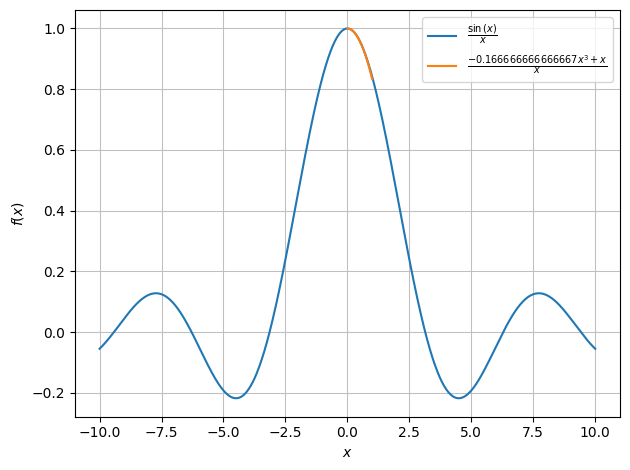

In [46]:
plt = dtuplot.plot(sin(x)/x,show=False)
plt.extend(dtuplot.plot((x-1/6*x**3)/x,(x, 0, 1), show=False))
plt.show()

Better approximaton

# Exercise 3

## a)
Matrix $\mathbf{A}$ is said to be normal if the following $\mathbf{A} \cdot \mathbf{A}^* = \mathbf{A}^* \cdot \mathbf{A}$ holds.

In [50]:
C_t = Matrix([[1, 2, 3, 4],[4, 1, 2, 3],[3, 4, 1, 2],[t, 3, 4, 1]])
C_2 = C_t.subs(t, 2)
C_2 * C_2.transpose() == C_2.transpose() * C_2 

True

## b)
From definition of eigenvector $\mathbf{A} \cdot \mathbf{v} = \lambda \mathbf{v}$.

In [55]:
v1 = Matrix([1, 1, 1, 1])
lamda_1 = C_2*v1
lamda_1

⎡10⎤
⎢  ⎥
⎢10⎥
⎢  ⎥
⎢10⎥
⎢  ⎥
⎣10⎦

$\lambda_{1} = 10$

## c)

In [56]:
v2 = Matrix([1, I, -1, -I])
lamda_2 = C_2*v2
lamda_2

⎡-2 - 2⋅ⅈ⎤
⎢        ⎥
⎢2 - 2⋅ⅈ ⎥
⎢        ⎥
⎢2 + 2⋅ⅈ ⎥
⎢        ⎥
⎣-2 + 2⋅ⅈ⎦

$\lambda_{2} = -2-2i$

## d)
The orthogonality of 2 vectors can be proven by finding their inner product.

In [58]:
v2.dot(v1)

## e)
One can normalize a vector  as follows: $\mathbf{v} = \frac{\mathbf{v}}{\Vert \mathbf{v} \Vert}$, where $\Vert \mathbf{v} \Vert = \sqrt{v_1 ^ 2 + v_2 ^ 2 + \dots + v_n ^ 2}$ is the norm.

In [60]:
v1.norm(), v2.norm()

The list $\mathbf{v_1}, \, \mathbf{v_2}$ is not orthonormal as the vectors are not normal.

# Exercise 4

## a)

In [65]:
A = Matrix([[2,-1],[-1,2]])
vec = Matrix([x1,x2])
#check if the matrix is correct
display((vec.transpose() * A * vec).expand())

⎡    2                 2⎤
⎣2⋅x₁  - 2⋅x₁⋅x₂ + 2⋅x₂ ⎦

In [69]:
b = Matrix([-4, 2])
c = 2
#final check
q = (vec.transpose() * A * vec)[0] + (vec.transpose() * b)[0] + c
q.expand()

$q(x_1, x_2) = \mathbf{x}^T \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}\mathbf{x} + \mathbf{x}^T \begin{bmatrix} -4 \\ 2 \end{bmatrix} + 2$

## b)

In orded to achive reduced quadratic form we need to find orthonormal basis $\beta = u_1, u_2, u_3$ for $\underline{\underline{A}}$ such that 
\begin{align*}
&(\underline{\underline{U}} * \underline{\tilde{x}})^T * \underline{\underline{A}} * (\underline{\underline{U}} * \underline{\tilde{x}}) + (\underline{\underline{U}} * \underline{\tilde{x}})^T * \underline{b} + c = 0 \\
&\underline{\tilde{x}}^T * \underline{\underline{U}}^T * \underline{\underline{A}} * \underline{\underline{U}} * \underline{\tilde{x}} + \underline{\tilde{x}}^T * \underline{\underline{U}}^T * \underline{b} + c = 0 \\
&\underline{\tilde{x}}^T * \underline{\underline{D}} * \underline{\tilde{x}} + \underline{\tilde{x}}^T * \underline{\underline{U}}^T * \underline{b} + c = 0,
\end{align*}
where $\underline{\underline{U}} = \begin{bmatrix} u_1 & u_2 & u_3 \end{bmatrix}$ and $\underline{\underline{D}}$ is a diagonal matrix of corresponding eigenvalues of $\underline{\underline{U}}$.

In [73]:
#Find the eigenvectors and eigenvalues of A
eigens = A.eigenvects() #returns a list of tuples with eigenvalue, its multiplicity, and eigenvectors

#print(eigens)

lamda1 = eigens[0][0] #first eigenvalue
lamda2 = eigens[1][0] #second eigenvalue

u1 = eigens[0][2][0] #first eigenvector lamda1
u2 = eigens[1][2][0] #second eigenvector lamda2

print(f"lamda1 = {lamda1}, u1 = {u1} \nlamda2 = {lamda2}, u2 = {u2}")

lamda1 = 1, u1 = Matrix([[1], [1]]) 
lamda2 = 3, u2 = Matrix([[-1], [1]])


From the spectral theorem we can emediately state that those 2 vectors are normal and only require normalization.

In [76]:
u1 = u1/u1.norm()
u2 = u2/u2.norm()
display(u1, u2)

⎡√2⎤
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎢√2⎥
⎢──⎥
⎣2 ⎦

⎡-√2 ⎤
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢ √2 ⎥
⎢ ── ⎥
⎣ 2  ⎦

In [79]:
Q = Matrix.hstack(u1, u2)
D = Matrix.diag(1,3)
display(Q)

⎡√2  -√2 ⎤
⎢──  ────⎥
⎢2    2  ⎥
⎢        ⎥
⎢√2   √2 ⎥
⎢──   ── ⎥
⎣2    2  ⎦

Our matrix $\mathbf{Q}^T$ is the matrix Q that we found above.

 ## Note
 we could also use ```P, D = M.diagonalize()```

In [87]:
q_d = (vec.transpose() * D * vec)[0] + (vec.transpose() * Q.transpose() * b)[0] + c
q_d

Using the complete squares rule one can reduce the expression above to the following: $(x_1 - \frac{\sqrt{2}}{2})^2+
3(x_2 + \frac{\sqrt{2}}{2})^2$. The validity of this expression is checked below. 

In [89]:
((x1-sqrt(2)/2)**2 + 3*(x2+sqrt(2)/2)**2).expand()

## d)
The location of the stationary point $(\frac{\sqrt{2}}{2}, -\frac{\sqrt{2}}{2}))$ can be translated back into $(x_1, x_2)$ coordinates by  performing the opposite operation to what we have done: multiplying the given coordinates by $\mathbf{Q}^T$.

In [90]:
v = Matrix([sqrt(2)/2, -sqrt(2)/2])
v_reg = Q * v
v_reg

⎡0 ⎤
⎢  ⎥
⎣-1⎦

The function has local minimum at the stationary point because it is parabola that faces up. 

## Exercise 5

## a)

In [116]:
v = symbols("v")

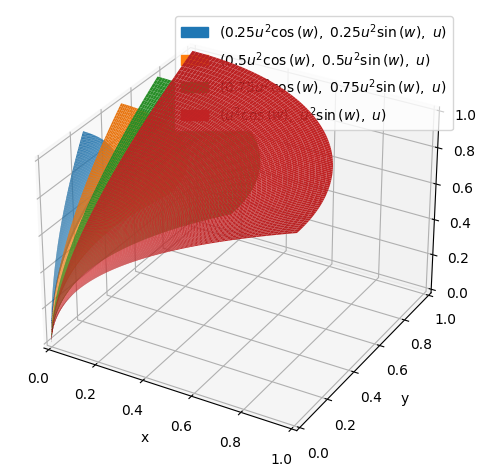

In [117]:
r = Matrix([v*u**2*cos(w),v*u**2*sin(w),u])
body = dtuplot.plot3d_parametric_surface(*r.subs(v, 0.25), (u, 0, 1), (w, 0, pi/2), show=False)
body.extend(dtuplot.plot3d_parametric_surface(*r.subs(v, 0.5), (u, 0, 1), (w, 0, pi/2), show=False))
body.extend(dtuplot.plot3d_parametric_surface(*r.subs(v, 0.75), (u, 0, 1), (w, 0, pi/2), show=False))
body.extend(dtuplot.plot3d_parametric_surface(*r.subs(v, 1), (u, 0, 1), (w, 0, pi/2), show=False))
body.show()

In [121]:
H_r = dtutools.hessian(r)
J_r = r.jacobian([v,u,w])
display(H_r, J_r)

⎡ 2⋅v⋅cos(w)    2⋅u⋅cos(w)  -2⋅u⋅v⋅sin(w)⎤
⎢                                        ⎥
⎢ 2⋅v⋅sin(w)    2⋅u⋅sin(w)  2⋅u⋅v⋅cos(w) ⎥
⎢                                        ⎥
⎢      0            0             0      ⎥
⎢                                        ⎥
⎢                              2         ⎥
⎢ 2⋅u⋅cos(w)        0        -u ⋅sin(w)  ⎥
⎢                                        ⎥
⎢                              2         ⎥
⎢ 2⋅u⋅sin(w)        0         u ⋅cos(w)  ⎥
⎢                                        ⎥
⎢      0            0             0      ⎥
⎢                                        ⎥
⎢                 2           2          ⎥
⎢-2⋅u⋅v⋅sin(w)  -u ⋅sin(w)  -u ⋅v⋅cos(w) ⎥
⎢                                        ⎥
⎢                2            2          ⎥
⎢2⋅u⋅v⋅cos(w)   u ⋅cos(w)   -u ⋅v⋅sin(w) ⎥
⎢                                        ⎥
⎣      0            0             0      ⎦

⎡ 2                         2         ⎤
⎢u ⋅cos(w)  2⋅u⋅v⋅cos(w)  -u ⋅v⋅sin(w)⎥
⎢                                     ⎥
⎢ 2                        2          ⎥
⎢u ⋅sin(w)  2⋅u⋅v⋅sin(w)  u ⋅v⋅cos(w) ⎥
⎢                                     ⎥
⎣    0           1             0      ⎦

In [159]:
Jac = abs(det(J_r).simplify())
Jac

## b)

In [160]:
V = Matrix([x + exp(y*z), 2*y-exp(x*z), 3*z + exp(x*y)])
f = V[0].diff(x) + V[1].diff(y) + V[2].diff(z)
f

## c)


## d)

In [163]:
integrand = f.subs({x: r[0], y: r[1], z: r[2]}) * Jac
integrate(integrand, (v, 0, 1), (u, 0, 1), (w, 0, pi/2))

In [162]:
f

# Exercise 6


In [138]:
h = 2*x - y + 1
r = Matrix([u, v, 2*u-v +1])
Jac = sqrt(6)

In [139]:
integrate(Jac, (u,0,2),(v,0,1))

## b)
\begin{equation}
    \begin{bmatrix} u \\ v(-\frac{1}{2}u + 1) \\ 2u - v(-\frac{1}{2}u + 1) + 1\end{bmatrix}
\end{equation}, 
$u \in [0,2]$, $v \in [0,1]$

In [141]:
r_2 = Matrix([u, v*(-0.5 * u + 1), 2*u - v*(-0.5*u + 1) + 1])
Jac_2 = sqrt((r_2.jacobian([u,v]).transpose() * r_2.jacobian([u,v])).det())
Jac_2

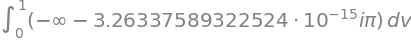

In [154]:
f = x + y + z -1
integrand = f.subs({x: r_2[0], y: r_2[1], z: r_2[2]}) * Jac_2
integrate(integrand, (u, 0, 2), (v, 0, 1))

In [155]:
integrand

In [149]:
v1 = r_2.diff(u)
v2 = r_2.diff(v)

(v1.cross(v2)).norm().simplify()

In [151]:
(v1.cross(v2)).norm().expand()

In [153]:
sqrt(6).evalf()